# Clustering Lab

 
Based of the amazing work you did in the Movie Industry you've been recruited to the NBA! You are working as the VP of Analytics that helps support a head scout, Mr. Rooney, for the worst team in the NBA probably the Wizards. Mr. Rooney just heard about Data Science and thinks it can solve all the team's problems!!! He wants you to figure out a way to find players that are high performing but maybe not highly paid that you can steal to get the team to the playoffs! 

In this document you will work through a similar process that we did in class with the NBA data files will be in the canvas assignment, merging them together.

Details: 

- Determine a way to use clustering to estimate based on performance if 
players are under or over paid, generally. 

- Then select players you believe would be best for your team and explain why. Do so in three categories: 
    * Examples that are not good choices (3 or 4) 
    * Several options that are good choices (3 or 4)
    * Several options that could work, assuming you can't get the players in the good category (3 or 4)

- You will decide the cutoffs for each category, so you should be able to explain why you chose them.

- Provide a well commented and clean report of your findings in a separate notebook that can be presented to Mr. Rooney, keeping in mind he doesn't understand...anything. Include a rationale for variables you included in the model, details on your approach and a overview of the results with supporting visualizations. 


Hints:

- Salary is the variable you are trying to understand 
- When interpreting you might want to use graphs that include variables that are the most correlated with Salary
- You'll need to scale the variables before performing the clustering
- Be specific about why you selected the players that you did, more detail is better
- Use good coding practices, comment heavily, indent, don't use for loops unless totally necessary and create modular sections that align with some outcome. If necessary create more than one script,list/load libraries at the top and don't include libraries that aren't used. 
- Be careful for non-traditional characters in the players names, certain graphs won't work when these characters are included.


In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import plotly.express as px
# import plotly.graph_objects as go
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import silhouette_score

In [98]:
print(salary_data.columns)
print(stats.columns)

Index(['Player', 'Tm', '2025-26'], dtype='str')
Index(['Rk', 'Player', 'Age', 'Team', 'Pos', 'G', 'GS', 'MP', 'FG', 'FGA',
       'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA',
       'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'Trp-Dbl', 'Awards', 'Player-additional'],
      dtype='str')


In [99]:
#Drop variables that will not be needed or are duplicates

In [ ]:
# reading in data
salary_data = pd.read_csv("2025_salaries.csv", header=1, encoding="latin-1")
stats = pd.read_csv("nba_2025.txt")

salary_data.head()

stats = pd.read_csv("nba_2025.txt", sep=",", encoding='latin-1')

# merging data
merged_data = pd.merge(salary_data, stats, on='Player')
merged_data.head()

# show duplicates
duplicates = merged_data[merged_data.duplicated(subset='Player', keep=False)]
print(duplicates)

                     Player   Tm       2025-26     Rk   Age Team Pos     G  \
0          Garrison Mathews  IND     $131,970   398.0  29.0  IND  SG  15.0   
1          Garrison Mathews  IND     $131,970   398.0  29.0  IND  SG  15.0   
2               Mac McClung  IND     $164,060   459.0  27.0  2TM  SG   4.0   
3               Mac McClung  IND     $164,060   459.0  27.0  IND  SG   3.0   
4               Mac McClung  IND     $164,060   459.0  27.0  CHI  SG   1.0   
25              Isaac Jones  DET   $1,955,377   515.0  25.0  2TM  PF   4.0   
26              Isaac Jones  DET   $1,955,377   515.0  25.0  SAC  PF   3.0   
27              Isaac Jones  DET   $1,955,377   515.0  25.0  DET  PF   1.0   
47           Leonard Miller  CHI   $2,221,677   429.0  22.0  2TM  SF  21.0   
48           Leonard Miller  CHI   $2,221,677   429.0  22.0  MIN  SF  19.0   
49           Leonard Miller  CHI   $2,221,677   429.0  22.0  CHI  SF   2.0   
52     Trayce Jackson-Davis  TOR   $2,221,677   338.0  25.0  2TM

In [ ]:
# drop dupicates
merged_cleaned = merged_data.drop_duplicates()
merged_cleaned = merged_data.drop(columns=['Awards','Player-additional'])

In [ ]:
# adjusting salary column
merged_cleaned['2025-26'] = (
    merged_cleaned['2025-26']
    .replace('[\$,]', '', regex=True)
    .astype(float)
)
merged_cleaned.describe()

<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipykernel_3146/3705434628.py:3: SyntaxWarning: invalid escape sequence '\$'
  .replace('[\$,]', '', regex=True)


,2025-26,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Trp-Dbl
count,5.140000e+02,524.000000,524.000000,524.000000,524.000000,524.000000,524.000000,524.000000,523.000000,524.000000,524.000000,494.000000,524.000000,524.000000,521.000000,523.000000,524.000000,524.000000,507.000000,524.000000,524.000000,524.000000,524.000000,524.000000,524.000000,524.000000,524.000000,524.000000,524.000000
mean,1.196891e+07,237.721374,26.364504,33.889313,15.776718,765.709924,132.952290,284.295802,0.458824,43.026718,119.582061,0.331814,89.925573,164.713740,0.540637,0.531071,58.507634,74.179389,0.764400,35.480916,100.536260,136.017176,82.666031,26.520992,14.958015,43.553435,62.986641,367.438931,0.110687
std,1.310238e+07,138.158106,4.337876,16.742544,18.294012,537.520467,116.819727,243.693257,0.109613,43.284015,113.306295,0.127476,88.795510,160.101874,0.130106,0.108558,68.009348,82.102291,0.133676,36.622272,85.105651,115.181898,84.087733,21.140917,17.703154,38.830108,43.756778,328.087613,0.668293
min,1.319700e+05,1.000000,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.546675e+06,119.750000,23.000000,22.000000,1.000000,273.250000,33.750000,78.750000,0.411500,7.000000,21.000000,0.302500,20.000000,37.500000,0.489000,0.497000,10.000000,13.000000,0.688500,9.000000,30.000000,41.750000,19.000000,7.000000,3.000000,12.000000,23.000000,93.500000,0.000000
50%,6.578558e+06,231.500000,26.000000,38.000000,6.000000,748.500000,102.000000,226.500000,0.452000,30.000000,90.000000,0.347000,62.000000,113.000000,0.537000,0.534000,32.500000,45.000000,0.779000,24.500000,84.000000,113.000000,57.500000,24.000000,9.000000,35.000000,62.500000,278.000000,0.000000
75%,1.484658e+07,354.000000,29.000000,48.000000,31.000000,1198.250000,205.000000,427.250000,0.500000,69.000000,187.500000,0.385000,136.000000,246.250000,0.596000,0.577500,82.000000,102.250000,0.854500,47.000000,151.000000,210.250000,116.000000,40.000000,20.250000,63.000000,95.500000,575.750000,0.000000
max,5.960682e+07,527.000000,41.000000,56.000000,56.000000,2008.000000,534.000000,1117.000000,1.000000,185.000000,492.000000,1.000000,447.000000,812.000000,1.000000,1.000000,403.000000,452.000000,1.000000,244.000000,454.000000,607.000000,452.000000,109.000000,106.000000,178.000000,182.000000,1558.000000,10.000000


In [ ]:
# viewing entire table
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# creating correlation matrix
corr_matrix = merged_cleaned.corr(numeric_only=True)

In [104]:
corr_matrix

,2025-26,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Trp-Dbl
2025-26,1.000000,-0.535812,0.349526,0.135024,0.513230,0.410876,0.568813,0.553550,0.089998,0.367095,0.379269,0.052356,0.567724,0.572363,-0.001318,0.063575,0.592058,0.586252,0.204333,0.162412,0.401854,0.348572,0.443709,0.304036,0.241680,0.504939,0.293362,0.576703,0.176015
Rk,-0.535812,1.000000,-0.049342,-0.634347,-0.750926,-0.855751,-0.877506,-0.875856,-0.164963,-0.721247,-0.736262,-0.236675,-0.802873,-0.812090,-0.056593,-0.217029,-0.756959,-0.765949,-0.242412,-0.455719,-0.743666,-0.694377,-0.713567,-0.707490,-0.485413,-0.799184,-0.747008,-0.876957,-0.211889
Age,0.349526,-0.049342,1.000000,-0.049438,0.062805,0.026717,0.051436,0.048636,0.030500,0.094980,0.084412,0.096025,0.021371,0.014291,0.049679,0.088973,0.078357,0.066087,0.023552,-0.038790,-0.007662,-0.017995,0.061298,0.010518,-0.057963,0.012025,-0.049747,0.065402,0.011779
G,0.135024,-0.634347,-0.049438,1.000000,0.571557,0.855084,0.700344,0.710495,0.126112,0.629209,0.652311,0.192721,0.614663,0.619806,0.019018,0.192409,0.503484,0.526333,0.081732,0.557314,0.710393,0.702094,0.593225,0.754723,0.515315,0.651455,0.834627,0.686110,0.109610
GS,0.513230,-0.750926,0.062805,0.571557,1.000000,0.846167,0.833360,0.824085,0.157112,0.635443,0.654665,0.099880,0.786621,0.791036,0.051096,0.157850,0.726742,0.743966,0.121241,0.514074,0.773049,0.734642,0.684941,0.690231,0.550344,0.766776,0.758765,0.827936,0.241935
MP,0.410876,-0.855751,0.026717,0.855084,0.846167,1.000000,0.920441,0.926337,0.145499,0.782241,0.804147,0.181586,0.829626,0.840884,0.028748,0.194742,0.748698,0.765313,0.161712,0.564030,0.848414,0.806211,0.789379,0.855587,0.573273,0.851457,0.899312,0.913866,0.215091
FG,0.568813,-0.877506,0.051436,0.700344,0.833360,0.920441,1.000000,0.986822,0.181860,0.755050,0.772021,0.175367,0.947549,0.955685,0.052160,0.190362,0.877099,0.885752,0.184292,0.498623,0.824359,0.767640,0.799955,0.769001,0.536432,0.894306,0.789504,0.993552,0.266070
FGA,0.553550,-0.875856,0.048636,0.710495,0.824085,0.926337,0.986822,1.000000,0.094653,0.819355,0.843694,0.177591,0.898866,0.925020,-0.008847,0.132116,0.865358,0.865195,0.223646,0.423862,0.790423,0.718795,0.820349,0.782817,0.485812,0.903381,0.783588,0.990217,0.264501
FG%,0.089998,-0.164963,0.030500,0.126112,0.157112,0.145499,0.181860,0.094653,1.000000,-0.073823,-0.099241,0.324068,0.275181,0.214262,0.762819,0.915167,0.141189,0.175704,-0.242353,0.379613,0.251591,0.306647,0.052219,0.096004,0.292153,0.115092,0.196400,0.149042,0.029973
3P,0.367095,-0.721247,0.094980,0.629209,0.635443,0.782241,0.755050,0.819355,-0.073823,1.000000,0.989996,0.290567,0.505890,0.546518,-0.072305,0.123497,0.579242,0.549061,0.300077,0.128660,0.529278,0.431981,0.643618,0.643522,0.256120,0.664262,0.619495,0.789690,0.113326


In [ ]:
# top 5 with highest correlation with salary
corr_matrix['2025-26'].drop('2025-26').sort_values(ascending=False).head(5)

FT     0.592058
FTA    0.586252
PTS    0.576703
2PA    0.572363
FG     0.568813
Name: 2025-26, dtype: float64

In [106]:
#Run the clustering algo with your best guess for K

# separate out the numeric features
features = ['FT','FTA','PTS','2PA','FG']
num_f = merged_cleaned[features]

# scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_f_scaled = scaler.fit_transform(num_f)
# build a kmeans model
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(num_f_scaled)

# look at the information in the model
print(kmeans.cluster_centers_)
print(kmeans.labels_)

[[-0.46262934 -0.4703244  -0.47926832 -0.48300484 -0.48083007]
 [ 1.33305787  1.35523105  1.38100279  1.39176951  1.38550295]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1
 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1
 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 1
 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0
 0 1 0 1 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 1 0 1 1 1

In [107]:
#View the results
# We end up seeing that cluster 1 is below average on all features, cluster 2 is above average.

# add the cluster labels to the original data frame
merged_cleaned["cluster"] = kmeans.labels_
merged_cleaned[["Player", "cluster"]].head()


,Player,cluster
0,Garrison Mathews,0
1,Garrison Mathews,0
2,Mac McClung,0
3,Mac McClung,0
4,Mac McClung,0


In [108]:
# How many are in each cluster
merged_cleaned["cluster"].value_counts()

cluster
0    389
1    135
Name: count, dtype: int64

In [109]:
# What each cluster represents
merged_cleaned.groupby("cluster")[features].mean()

,FT,FTA,PTS,2PA,FG
cluster,,,,,
0,27.074550,35.601542,210.347044,87.457584,76.835476
1,149.081481,185.340741,820.096296,387.325926,294.651852


In [110]:
# Examples from the clusters

display(merged_cleaned[merged_cleaned["cluster"] == 0][['FT','FTA','PTS','2PA','FG']].head())
display(merged_cleaned[merged_cleaned["cluster"] == 1][['FT','FTA','PTS','2PA','FG']].head())

,FT,FTA,PTS,2PA,FG
0,19.0,23.0,78.0,6.0,21.0
1,19.0,23.0,78.0,6.0,21.0
2,3.0,4.0,23.0,13.0,9.0
3,3.0,4.0,19.0,8.0,7.0
4,0.0,0.0,4.0,5.0,2.0


,FT,FTA,PTS,2PA,FG
31,104.0,136.0,629.0,254.0,217.0
65,66.0,94.0,734.0,197.0,261.0
67,143.0,183.0,582.0,331.0,207.0
76,116.0,135.0,763.0,164.0,246.0
96,101.0,145.0,796.0,373.0,294.0


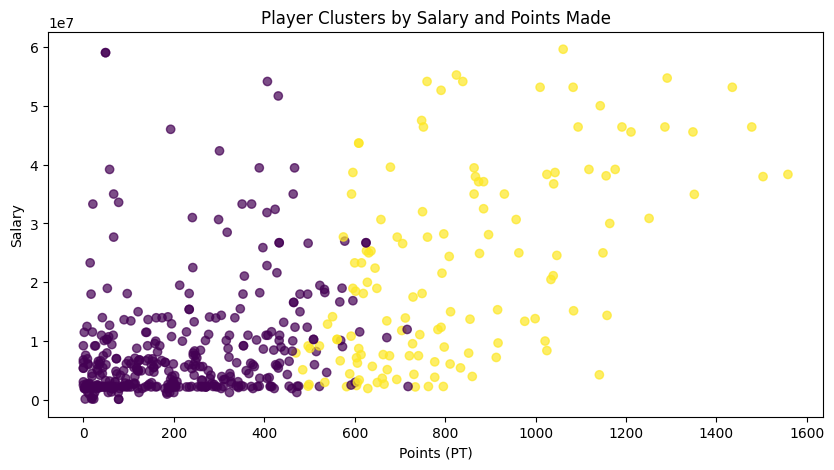

In [111]:
#Create a visualization of the results with 2 or 3 variables that you think will best
#differentiate the clusters
plt.figure(figsize=(10,5))
plt.scatter(
    merged_cleaned["PTS"],
    merged_cleaned["2025-26"],
    c=merged_cleaned["cluster"],
    alpha=0.7
)

plt.xlabel("Points (PT)")
plt.ylabel("Salary")
plt.title("Player Clusters by Salary and Points Made")
plt.show()


In [112]:
# valuate the quality of the clustering using total variance explained and silhouette scores
# Within-Cluster Sum of Squares (WCSS) (minimize)
# Total Sum of Squares (TSS) (maximize)
# Variance = 1 - (WCSS/TSS) --> this should be closest to 1 

# WCSS
wcss = kmeans.inertia_

# TSS
tss = np.sum((num_f_scaled - num_f_scaled.mean(axis=0))**2)

variance_explained = 1 - wcss/tss
print("Total variance explained:", variance_explained)

# Silhouette Scores:
# how similar points are to their own cluster compared to other clusters
# we want closest to 1
sil_score = silhouette_score(num_f_scaled, kmeans.labels_)
print("Silhouette score:", sil_score)

Total variance explained: 0.6508807398504552
Silhouette score: 0.6142812030046548


In [113]:
#Determine the ideal number of clusters using the elbow method and the silhouette coefficient
inertias = []
sil_scores = []
k_values = range(2,10) 

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(num_f_scaled)
    # WCSS
    inertias.append(kmeans.inertia_)
    # Silhoutte score
    sil = silhouette_score(num_f_scaled, kmeans.labels_)
    sil_scores.append(sil)

Text(0.5, 1.0, 'Silhouette Coefficient')

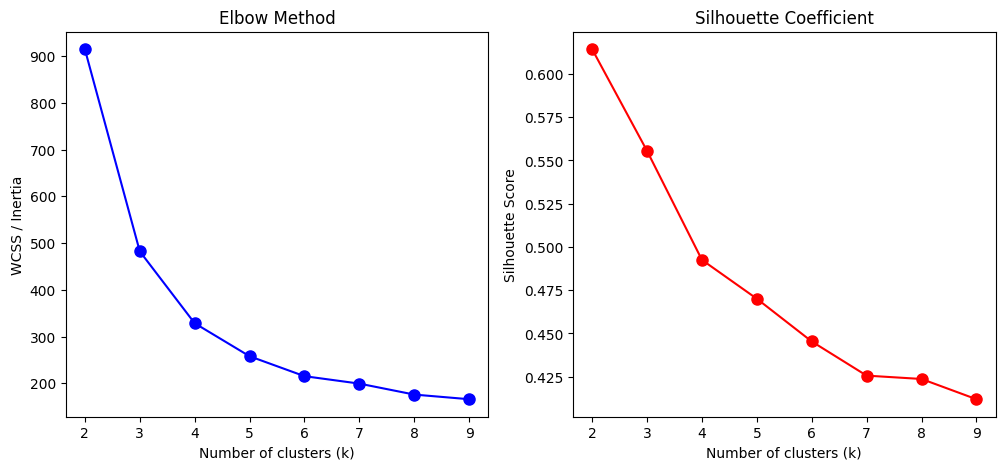

In [114]:
#Visualize the results of the elbow method
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(k_values, inertias, 'bo-', markersize=8)
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS / Inertia')
plt.title('Elbow Method')

plt.subplot(1,2,2)
plt.plot(k_values, sil_scores, 'ro-', markersize=8)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Coefficient')

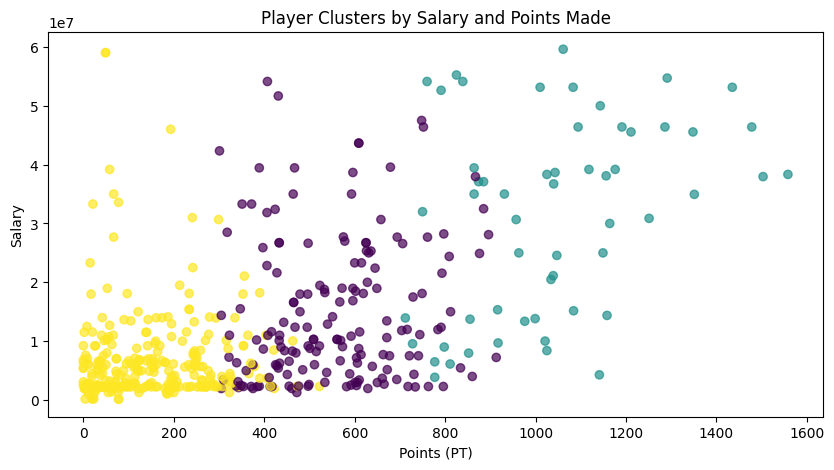

In [115]:
#Use the recommended number of cluster (assuming it's different) to retrain your model and visualize the results
kmeans_2 = KMeans(n_clusters=3, random_state=42)
kmeans_2.fit(num_f_scaled)

merged_cleaned["cluster"] = kmeans_2.labels_
merged_cleaned[["Player", "cluster"]].head()

plt.figure(figsize=(10,5))
plt.scatter(
    merged_cleaned["PTS"],
    merged_cleaned["2025-26"],
    c=merged_cleaned["cluster"],
    alpha=0.7
)

plt.xlabel("Points (PT)")
plt.ylabel("Salary")
plt.title("Player Clusters by Salary and Points Made")
plt.show()


In [116]:
#Once again evaluate the quality of the clustering using total variance explained and silhouette scores
# WCSS
wcss = kmeans.inertia_

# TSS
tss = np.sum((num_f_scaled - num_f_scaled.mean(axis=0))**2)

variance_explained = 1 - wcss/tss
print("Total variance explained:", variance_explained)

# Silhouette Scores:
# how similar points are to their own cluster compared to other clusters
# we want closest to 1
sil_score = silhouette_score(num_f_scaled, kmeans_2.labels_)
print("Silhouette score:", sil_score)

Total variance explained: 0.9366143166575667
Silhouette score: 0.5555049266205992


In [ ]:
# With k=3, we can see that total variance improved dramatically, much closer to 1. However, silhouette score dropped slightly.
# With the dramatic increase in variance, though, this still proves to be more optimal than k=2. 

In [118]:
#Use the model to select players for Mr. Rooney to consider
# Step 1: Compute Value Score
merged_cleaned['Value_Score'] = merged_cleaned['PTS'] / merged_cleaned['2025-26']

# Step 2: Decide cutoffs using percentiles
good_cutoff = merged_cleaned['Value_Score'].quantile(0.75)      # top 25% value
could_work_cutoff = merged_cleaned['Value_Score'].quantile(0.50)  # middle 25–50%

# Step 3: Assign categories based on Value Score
def assign_category(row):
    if row['Value_Score'] >= good_cutoff:
        return 'Good Choices'
    elif row['Value_Score'] >= could_work_cutoff:
        return 'Could Work'
    else:
        return 'Not Good / Overpaid'

merged_cleaned['Category'] = merged_cleaned.apply(assign_category, axis=1)

# Step 4: Pick top 3–4 players from each category
good_players = merged_cleaned[merged_cleaned['Category']=='Good Choices'].sort_values('Value_Score', ascending=False).head(4)
could_work_players = merged_cleaned[merged_cleaned['Category']=='Could Work'].sort_values('Value_Score', ascending=False).head(4)
bad_players = merged_cleaned[merged_cleaned['Category']=='Not Good / Overpaid'].sort_values('Value_Score', ascending=False).head(4)

# Step 5: Display selections
print("Good Choices:\n", good_players[['Player','PTS','2025-26','Value_Score']])
print("\nCould Work:\n", could_work_players[['Player','PTS','2025-26','Value_Score']])
print("\nNot Good / Overpaid:\n", bad_players[['Player','PTS','2025-26','Value_Score']])

Good Choices:
                Player    PTS    2025-26  Value_Score
0    Garrison Mathews   78.0   131970.0     0.000591
1    Garrison Mathews   78.0   131970.0     0.000591
17     Maxime Raynaud  472.0  1272870.0     0.000371
96  Russell Westbrook  796.0  2296274.0     0.000347

Could Work:
              Player    PTS    2025-26  Value_Score
94     Drew Eubanks  163.0  2296274.0     0.000071
230      Cam Thomas  425.0  5993172.0     0.000071
299  Quentin Grimes  609.0  8741209.0     0.000070
247  Day'Ron Sharpe  434.0  6250000.0     0.000069

Not Good / Overpaid:
             Player    PTS     2025-26  Value_Score
411  Collin Sexton  596.0  18975000.0     0.000031
416  Jarrett Allen  628.0  20000000.0     0.000031
92     Amir Coffey   72.0   2296274.0     0.000031
324     Jaden Ivey  316.0  10107163.0     0.000031


In [ ]:
# Write up the results in a separate notebook with supporting visualizations and 
# an overview of how and why you made the choices you did. This should be at least 
# 500 words and should be written for a non-technical audience.